# Question_2 - Analysis_2

In [8]:
import json
from pprint import pprint
import glob
import os
import re
import datetime
import csv
import string
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
files=glob.glob(r'C:\Users\Manav Desai\Documents\Data_Analytics_using_Python\desai_manav_spring2017\Midterms\Question_2\data\ArticleSearch\*')
words_news=[]
for file in files:
    with open(file) as data_file:    
        data = json.load(data_file)
        x=data['response']['docs']
        for each in x:
            snippet=str(each['snippet'])
            
            words=re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', snippet)        
            words_news.append(words)
words_news=sum(words_news,[])


words_news =[''.join(c for c in s if c not in string.punctuation) for s in words_news]
words_news = [s for s in words_news if s]


words_news=[x.lower() for x in words_news]

stop = stopwords.words('english')
words_news = [word for word in words_news if word not in stop]

Frequency=Counter(words_news).most_common(len(set(words_news)))

with open('Word_VS_Counts(Analysis_(2)2).csv','w',newline='') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Word','Count'])
    for row in Frequency:
        csv_out.writerow(row)

In [10]:
Frequency

[('said', 1321),
 ('new', 862),
 ('state', 547),
 ('two', 498),
 ('year', 495),
 ('friday', 473),
 ('president', 471),
 ('tuesday', 442),
 ('saturday', 429),
 ('sunday', 429),
 ('monday', 418),
 ('thursday', 405),
 ('wednesday', 399),
 ('police', 398),
 ('first', 388),
 ('one', 388),
 ('city', 359),
 ('people', 327),
 ('york', 325),
 ('man', 319),
 ('years', 288),
 ('world', 284),
 ('week', 277),
 ('government', 273),
 ('last', 272),
 ('former', 267),
 ('united', 262),
 ('three', 260),
 ('federal', 259),
 ('home', 250),
 ('would', 242),
 ('died', 233),
 ('time', 230),
 ('group', 225),
 ('officials', 218),
 ('country', 216),
 ('says', 215),
 ('night', 211),
 ('say', 206),
 ('states', 206),
 ('court', 204),
 ('four', 198),
 ('day', 197),
 ('trump', 196),
 ('times', 187),
 ('second', 181),
 ('old', 181),
 ('could', 175),
 ('company', 174),
 ('killed', 173),
 ('million', 172),
 ('donald', 172),
 ('obama', 171),
 ('long', 167),
 ('season', 164),
 ('national', 164),
 ('family', 164),
 ('mini

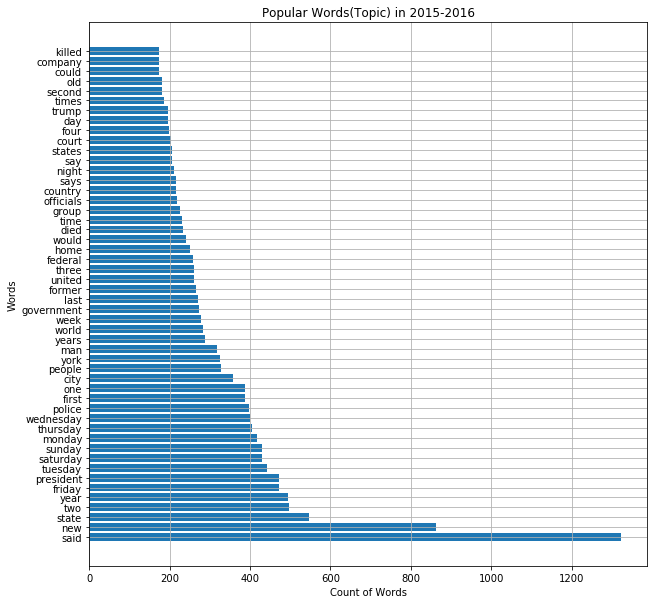

In [11]:
y=[seq[1] for seq in Frequency[0:50]]
x=[seq[0] for seq in Frequency[0:50]]
plt.figure(figsize=(10, 10))
plt.barh(range(len(x)),y,align='center')
plt.yticks(range(len(x)),x)
plt.title('Popular Words(Topic) in 2015-2016')
plt.ylabel('Words')
plt.xlabel('Count of Words')
plt.grid(True)
plt.show()